In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

Getting training data

In [3]:
iris = load_iris()
X = iris.data
y=iris.target
target_names = iris.target_names

Creating a dataframe for easier manipulation

In [4]:
iris_df = pd.DataFrame(data=X, columns = iris.feature_names)
iris_df['species'] = y

In [5]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [6]:
iris_df.shape

(150, 5)

Fetching Data from Plant API

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

Initialize the classifier

In [11]:
clf = DecisionTreeClassifier()
rf = RandomForestClassifier()

Training the model 

In [12]:
clf.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
y_pred_clf = clf.predict(X_test)
y_pred_rf = rf.predict(X_test)

Evaluate the model

In [14]:
accuracy_clf = accuracy_score(y_test,y_pred_clf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f'Accuracy of Decision Tree Classifier is:{accuracy_clf:.2f}')
print(f'Accuracy of Random Forest Classifier is:{accuracy_rf:.2f}')

Accuracy of Decision Tree Classifier is:1.00
Accuracy of Random Forest Classifier is:1.00


In [15]:
print('Classification_report:')
print(classification_report(y_test, y_pred_rf, target_names=target_names))

Classification_report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Getting feature importance for RandomForest Model

/var/folders/1j/bwghbjg539dg4w3g11v51fmc0000gn/T/ipykernel_87293/2291295301.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances['Importance'], y=feature_importances.index, palette='viridis')


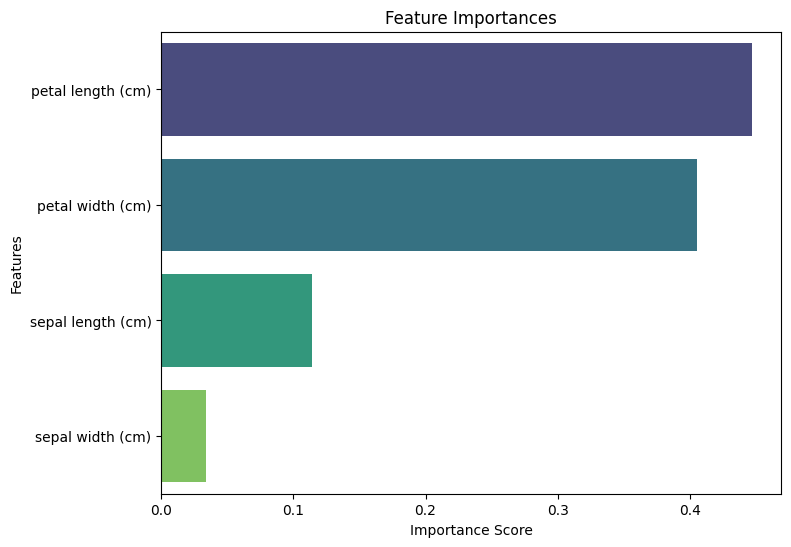

Feature Importances:
                   Importance
petal length (cm)    0.446903
petal width (cm)     0.405193
sepal length (cm)    0.114336
sepal width (cm)     0.033569


In [16]:
# Feature importance
importances = rf.feature_importances_
feature_names = iris.feature_names

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame(importances, index=feature_names, columns=['Importance']).sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances['Importance'], y=feature_importances.index, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Print feature importances
print("Feature Importances:")
print(feature_importances)